# Preliminary analysis G-research dataset

## Data importation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics, discriminant_analysis, preprocessing, linear_model, feature_selection, model_selection
from sklearn import decomposition, tree, utils, ensemble, neural_network, cluster
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import time

In [2]:
# Set seed for reproducibility
np.random.seed(0)
# Imports data
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0) 

In [3]:
train.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,4.416943e-05,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,4.193762e-05,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,2.030442e-06,0.000306,4.079460e-08,159.692076,-0.000003,29.824024
3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,6.980798e-07,0.000205,9.502066e-09,212.160378,-0.000008,100.388668
4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,2.064450e-05,0.001525,3.428403e-07,153.724351,0.000065,5.950714


In [4]:
test.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
Index,,,,,,,,,,,,,,
0,1,13,363,0.000842,0.436594,0.477848,1.535381e-06,4.353950e-06,7.718616e-06,1.632886e-05,3.267851e-05,0.001661,9.724611e-07,112.968475
1,1,13,1223,0.020800,0.636143,0.670798,5.204133e-06,9.546012e-06,1.575258e-05,2.804666e-05,1.082500e-05,0.002104,2.146299e-05,100.000000
2,1,13,1372,0.068580,0.478891,0.481816,5.433730e-08,1.733539e-07,3.866963e-07,8.520664e-07,2.103176e-06,0.000222,3.085296e-08,188.335508
3,1,13,1942,0.011986,0.463201,0.294900,1.103215e-08,3.555558e-08,7.280376e-08,1.364231e-07,3.155050e-07,0.000141,1.678216e-08,212.123913
4,1,13,2712,0.000164,0.549980,0.352332,4.494670e-07,8.503405e-07,1.222847e-06,1.901114e-06,4.048304e-06,0.001235,4.595200e-07,124.024977


In [5]:
traintest = train.drop(['y', 'Weight'], axis = 1).append(test)
traintest.sort_values(['Market', 'Day', 'Stock'], inplace = True)
traintest.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
Index,,,,,,,,,,,,,,
155,1,1,10,0.015405,0.546394,0.492828,4.942061e-08,1.418661e-07,2.938473e-07,5.243638e-07,0.000001,0.000287,3.494789e-08,205.968015
157,1,1,12,0.005828,0.534115,0.391960,1.010713e-07,2.906329e-07,5.558849e-07,1.054579e-06,0.000003,0.000369,2.937158e-08,170.786494
85,1,1,15,0.000847,0.429354,0.292225,3.241896e-07,1.119926e-06,2.374847e-06,4.091181e-06,0.000004,0.001175,1.117300e-07,115.216234
130,1,1,20,0.009568,0.529887,0.642264,2.715108e-07,8.424473e-07,1.739159e-06,3.026351e-06,0.000006,0.000562,7.413104e-08,100.112831
135,1,1,22,0.060166,0.888481,0.236378,2.890282e-06,3.759807e-06,2.858839e-06,3.814081e-06,0.000004,0.006380,1.097446e-05,100.000000


## General properties of the dataset

In [6]:
print "Train dataset:"
print "Number of data points: ", len(train.index)
print "Number of markets: ", train.Market.nunique()
print "Number of days: ", train.Day.nunique()
print "Number of stocks: ", train.Stock.nunique()
print "Number of features: ", train.shape[1] - 5
n_features = train.shape[1] - 5
print "Sparsity of the training data: ", np.exp(np.log(train.shape[0])/n_features)

print "Test dataset:"
print "Number of samples: ", len(test.index)
print "Number of markets: ", test.Market.nunique()
print "Number of days: ", test.Day.nunique()
print "Number of stocks: ", test.Stock.nunique()
print "Number of features: ", test.shape[1] - 3
n_features = test.shape[1] - 3
print "Sparsity of the training data: ", np.exp(np.log(test.shape[0])/n_features)

Train dataset:
Number of data points:  623817
Number of markets:  4
Number of days:  258
Number of stocks:  3022
Number of features:  11
Sparsity of the training data:  3.36374745623
Test dataset:
Number of samples:  640430
Number of markets:  4
Number of days:  258
Number of stocks:  3017
Number of features:  11
Sparsity of the training data:  3.37179421103


The sparsity is the subdivision of each side of a n_feature dimensional cube that would result in a single observation per subdivision on average.

### Days

In [20]:
# The days on which we have some data
days_train = np.sort(train.loc[:,['Day']].drop_duplicates().values.reshape(-1))
days_test = np.sort(test.loc[:,['Day']].drop_duplicates().values.reshape(-1))
days_train

array([  1,   2,   5,   6,   7,   8,   9,  12,  19,  20,  21,  22,  30,
        37,  41,  43,  44,  47,  48,  49,  54,  55,  56,  57,  58,  61,
        62,  64,  65,  68,  71,  78,  82,  85,  86,  89,  92,  93,  97,
        98, 104, 105, 110, 111, 113, 114, 117, 124, 125, 127, 128, 131,
       132, 134, 135, 138, 140, 145, 147, 148, 153, 154, 156, 160, 161,
       166, 167, 168, 169, 173, 174, 180, 183, 184, 187, 190, 195, 197,
       198, 201, 202, 203, 211, 215, 216, 219, 222, 223, 225, 226, 229,
       230, 233, 236, 237, 238, 243, 244, 245, 247, 254, 264, 265, 266,
       267, 268, 272, 273, 274, 278, 279, 280, 285, 288, 292, 295, 299,
       301, 303, 307, 313, 315, 317, 322, 323, 327, 329, 334, 336, 338,
       343, 344, 348, 349, 350, 359, 362, 364, 371, 372, 378, 379, 384,
       385, 390, 391, 392, 393, 394, 397, 399, 404, 405, 408, 411, 412,
       418, 419, 421, 422, 425, 427, 428, 429, 433, 434, 435, 436, 439,
       440, 446, 448, 449, 455, 461, 462, 463, 469, 470, 471, 47

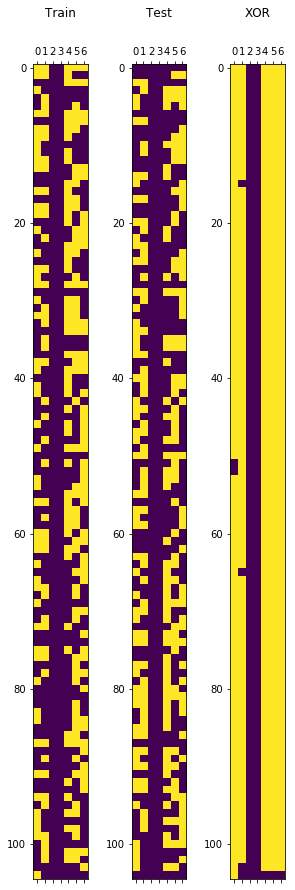

In [21]:
days_train_bool = np.array([day + 1 in days_train for day in range(735)]).reshape(-1,7)
days_test_bool = np.array([day + 1 in days_test for day in range(735)]).reshape(-1,7)
xor_days_train_test = np.logical_xor(days_train_bool, days_test_bool)
plt.figure(figsize=(5,15))
ax1 = plt.subplot(131)
ax1.matshow(days_train_bool)
ax1.set_title('Train')
ax2 = plt.subplot(132)
ax2.matshow(days_test_bool)
ax2.set_title('Test')
ax3 = plt.subplot(133)
ax3.matshow(xor_days_train_test)
ax3.set_title('XOR')
plt.show()
# We see the weekends. There are three fridays, regularly spaced, and two consecutive thursdays where we have no data.
# Are those holidays?
# Else the train and test set are complementary. 

In [22]:
#We should create features for the days of the week

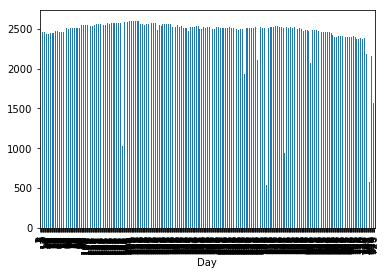

In [23]:
traintest.Day.groupby([traintest.Day],sort=False).count().plot(kind='bar')

### Markets

In [24]:
print "Count train: "
print train.loc[:,['Market', 'Day', 'Stock']].groupby('Market').nunique().loc[:,['Day', 'Stock']]
print "----------"
print "Count test: "
print test.loc[:,['Market', 'Day', 'Stock']].groupby('Market').nunique().loc[:,['Day', 'Stock']]

Count train: 
        Day  Stock
Market            
1       249    452
2       251    546
3       248   1793
4       256    231
----------
Count test: 
        Day  Stock
Market            
1       253    452
2       255    544
3       256   1790
4       255    231


### Stocks

In [25]:
print "Train"
print "-----"
print "Day count: "
print train.loc[:,['Day', 'Stock']].groupby('Stock').nunique().Day.describe()
print "Market count: "
print train.loc[:,['Market', 'Stock']].groupby('Stock').nunique().Market.describe()

Train
-----
Day count: 
count    3022.000000
mean      206.425215
std        71.953032
min         1.000000
25%       188.000000
50%       247.000000
75%       247.000000
max       256.000000
Name: Day, dtype: float64
Market count: 
count    3022.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Market, dtype: float64


In [26]:
print "Test"
print "----"
print "Day count: "
print test.loc[:,['Day', 'Stock']].groupby('Stock').nunique().Day.describe()
print "Market count: "
print test.loc[:,['Market', 'Stock']].groupby('Stock').nunique().Market.describe()

Test
----
Day count: 
count    3017.000000
mean      212.273782
std        74.141465
min         1.000000
25%       195.000000
50%       255.000000
75%       256.000000
max       256.000000
Name: Day, dtype: float64
Market count: 
count    3017.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Market, dtype: float64


Each stock belongs to a single market.

In [27]:
# Let's pick a stock
train_stock_ex = train[train.Stock == 467]
print "Days for Stock 363: ", train_stock_ex.Day.values
# Another one
train_stock_ex = train[train.Stock == 1]
print "Days for Stock 1: ", train_stock_ex.Day.values

Days for Stock 363:  [  1   2   5   6   7   8   9  12  20  21  22  30  37  41  43  44  48  49
  54  55  56  57  58  61  62  64  65  68  71  78  82  85  86  89  92  93
  97  98 104 105 110 111 113 114 117 124 125 127 128 131 132 134 135 138
 140 147 148 153 154 156 160 161 166 167 168 169 173 174 180 183 187 190
 195 197 198 201 202 203 211 215 216 219 222 223 225 226 229 230 233 236
 237 238 244 245 247 254 264 265 266 267 268 272 273 274 278 279 280 285
 288 292 295 299 301 303 307 313 315 317 322 323 327 329 334 336 338 343
 344 348 349 350 359 362 364 371 372 378 379 384 385 390 391 392 393 394
 397 399 404 405 408 412 418 419 421 422 425 427 428 429 433 434 435 436
 439 440 446 448 449 455 461 462 463 469 470 471 475 478 482 484 496 497
 499 503 505 506 518 526 527 530 532 533 534 538 539 545 552 553 554 559
 567 580 582 587 589 594 595 601 602 607 608 610 611 615 616 623 625 629
 637 638 639 643 644 649 651 658 659 660 663 667 671 673 677 678 680 687
 692 695 699 702 709 712 713 7

We don't necessarily have consecutive days. Not sure it makes sense to use a RNN for instance. Or should we try to fill the data?

### Weights

In [28]:
train.Weight.describe()
# There is really a large discrepancy of weights... We should log them.

count    623817.000000
mean         14.723355
std          24.390745
min           0.002797
25%           2.271488
50%           6.144597
75%          16.649687
max         694.001930
Name: Weight, dtype: float64

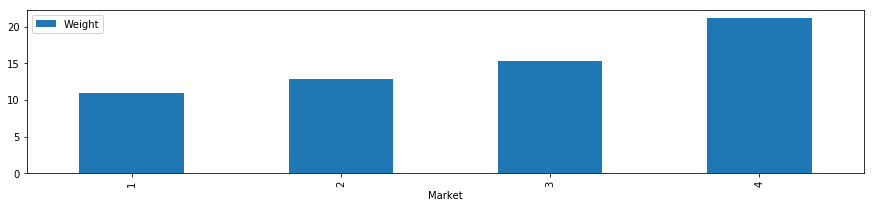

In [29]:
# Average weight by market
plt.figure(figsize=(15,3))
ax = plt.subplot(111)
train.loc[:,['Weight', 'Market']].groupby('Market').mean().plot.bar(ax = ax)
# Market 4 has a higher weight.

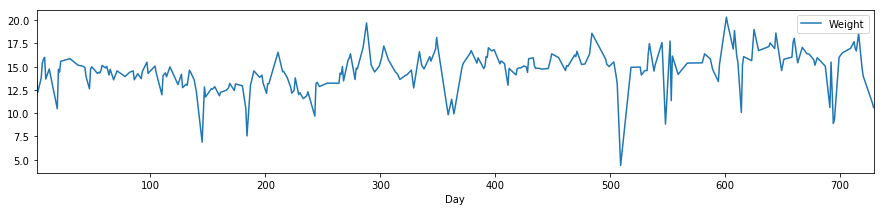

In [30]:
# Average weight by day
plt.figure(figsize=(15,3))
ax = plt.subplot(111)
train.loc[:,['Weight', 'Day']].groupby('Day').mean().plot(ax = ax)
# No trend

            Weight
count  3022.000000
mean     12.913826
std      21.595438
min       0.094431
25%       1.795821
50%       5.297464
75%      14.400218
max     398.892927


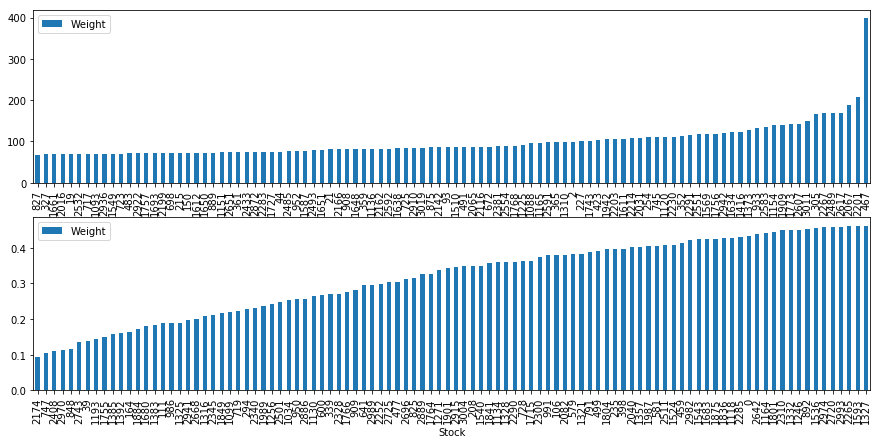

In [31]:
# Average weight by stock
weight_by_stock = train.loc[:,['Weight', 'Stock']].groupby('Stock').mean()
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
weight_by_stock.sort_values(by = 'Weight').iloc[-100:,:].plot.bar(ax = ax)
ax2 = plt.subplot(212)
weight_by_stock.sort_values(by = 'Weight').iloc[:100,:].plot.bar(ax = ax2)
print weight_by_stock.describe()
# Some stocks have a much higher weight

In [32]:
# Spearman rank correlation between the weights and the features
for feat in train.drop(['Market', 'Day', 'Stock', 'Weight'], axis = 1).columns:
    res = stats.spearmanr(train[feat], train.Weight)
    print "{}, correlation: {}, p-value: {}".format(feat, res.correlation, res.pvalue)

x0, correlation: 0.393980323608, p-value: 0.0


C:\Users\Sam\Anaconda2\lib\site-packages\scipy\stats\mstats_basic.py:484: RuntimeWarning: overflow encountered in long_scalars
  denom = n*(n**2 - 1)/6.


x1, correlation: nan, p-value: nan
x2, correlation: nan, p-value: nan
x3A, correlation: -0.815213781762, p-value: 0.0
x3B, correlation: -0.795527512194, p-value: 0.0
x3C, correlation: -0.763815235456, p-value: 0.0
x3D, correlation: -0.708166997022, p-value: 0.0
x3E, correlation: -0.574949367069, p-value: 0.0
x4, correlation: -0.796662923631, p-value: 0.0
x5, correlation: -0.800975185909, p-value: 0.0
x6, correlation: 0.146996794143, p-value: 0.0
y, correlation: -0.135479605701, p-value: 0.0


In [33]:
# Pearson correlation between the weights and the features
for feat in train.drop(['Market', 'Day', 'Stock', 'Weight'], axis = 1).columns:
    res = stats.pearsonr(train[feat], train.Weight)
    print "{}, correlation: {}, p-value: {}".format(feat, res[0], res[1])

x0, correlation: -0.00165675914955, p-value: 0.190689802573
x1, correlation: nan, p-value: 1.0
x2, correlation: nan, p-value: 1.0
x3A, correlation: -0.0322775220947, p-value: 1.96857504827e-143
x3B, correlation: -0.0339628224268, p-value: 1.35977874244e-158
x3C, correlation: -0.031157232607, p-value: 8.8231740052e-134
x3D, correlation: -0.0261343946248, p-value: 1.08319257799e-94
x3E, correlation: -0.0240214882712, p-value: 2.72572911991e-80
x4, correlation: -0.27956315485, p-value: 0.0
x5, correlation: -0.0317847693469, p-value: 3.81279355089e-139
x6, correlation: 0.0211833376139, p-value: 7.54901852142e-63
y, correlation: -0.0353456103625, p-value: 1.31299317084e-171


C:\Users\Sam\Anaconda2\lib\site-packages\scipy\stats\stats.py:3030: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
C:\Users\Sam\Anaconda2\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


We that features x3A-x5 are consistently negatively correlated to the weights. x6 is positively correlated to the weights.

### Response

In [34]:
train.y.describe()
# Is that a daily return?

count    623817.000000
mean          0.000075
std           0.001047
min          -0.071099
25%          -0.000107
50%           0.000027
75%           0.000203
max           0.066617
Name: y, dtype: float64

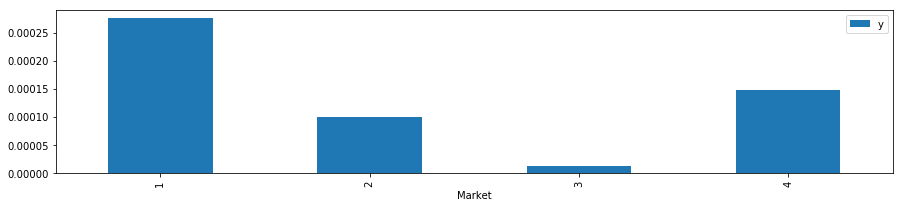

In [35]:
# Average response by market
plt.figure(figsize=(15,3))
ax = plt.subplot(111)
train.loc[:,['y', 'Market']].groupby('Market').mean().plot.bar(ax = ax)

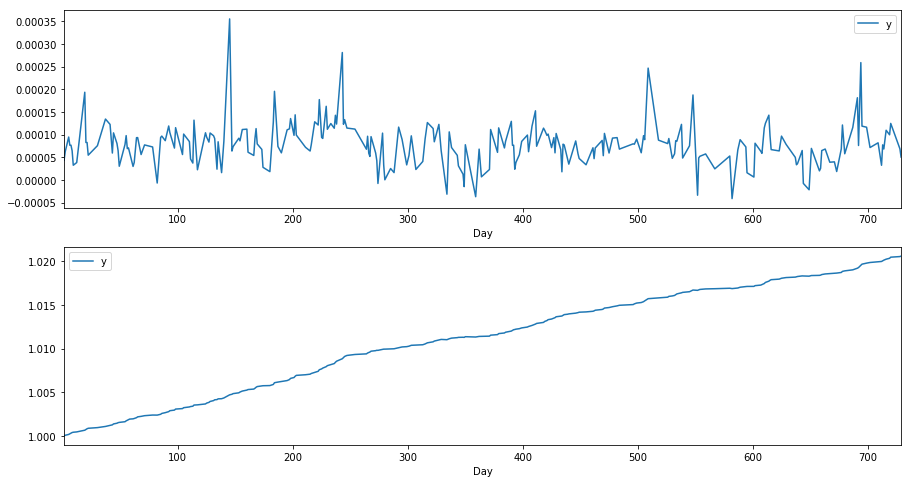

In [36]:
# Average response by day
plt.figure(figsize=(15,8))
ax = plt.subplot(211)
train.loc[:,['y', 'Day']].groupby('Day').mean().plot(ax = ax)
ax2 = plt.subplot(212)
np.exp(np.log(1 + train.loc[:,['y', 'Day']].groupby('Day').mean()).cumsum()).plot(ax = ax2)
# If those are returns, their strategy is working really well

                 y
count  3022.000000
mean      0.000124
std       0.000556
min      -0.004207
25%      -0.000024
50%       0.000020
75%       0.000095
max       0.010637


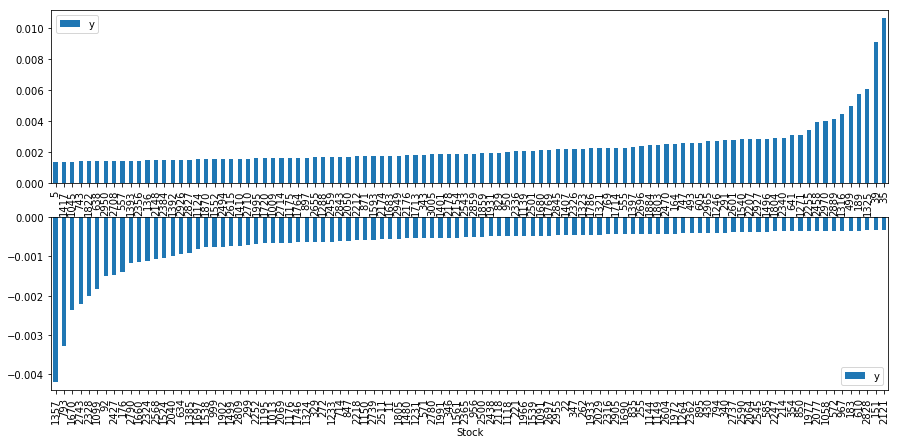

In [37]:
# Average response by stock
weight_by_stock = train.loc[:,['y', 'Stock']].groupby('Stock').mean()
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
weight_by_stock.sort_values(by = 'y').iloc[-100:,:].plot.bar(ax = ax)
ax2 = plt.subplot(212)
weight_by_stock.sort_values(by = 'y').iloc[:100,:].plot.bar(ax = ax2)
print weight_by_stock.describe()
# Some stocks have a much higher weight

### Features

Statistics of the features

In [38]:
train.drop(['Market', 'Day', 'Stock'], axis = 1).describe()

,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
count,6.238170e+05,623762.000000,623812.000000,6.238170e+05,6.238170e+05,623817.000000,623817.000000,623817.000000,623817.000000,6.238170e+05,623817.000000,623817.000000,623817.000000
mean,3.513422e+01,1.515302,0.975639,3.569196e-06,7.650938e-06,0.000013,0.000020,0.000033,0.001772,5.257464e-06,275.436028,0.000075,14.723355
std,7.673634e+03,4.594337,2.498639,5.585191e-05,1.104701e-04,0.000196,0.000355,0.000583,0.002313,8.692817e-05,1799.850048,0.001047,24.390745
min,0.000000e+00,0.000013,0.000313,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000e+00,1.000000,-0.071099,0.002797
25%,2.038527e-03,0.701935,0.392679,2.262748e-07,6.104431e-07,0.000001,0.000002,0.000004,0.000544,1.501948e-07,100.000000,-0.000107,2.271488
50%,1.095818e-02,1.040783,0.625408,6.904246e-07,1.789302e-06,0.000003,0.000006,0.000010,0.001056,5.696645e-07,100.000000,0.000027,6.144597
75%,4.378452e-02,1.650996,0.992129,2.355756e-06,5.706755e-06,0.000010,0.000016,0.000027,0.002131,2.338320e-06,200.000000,0.000203,16.649687
max,4.998275e+06,2946.263900,677.912473,2.831509e-02,6.514162e-02,0.109440,0.206560,0.361169,0.102200,3.589258e-02,734914.404967,0.066617,694.001930


 - The features are not normalized. 
 - The average weight is 14, median 6

#### Log of the features

In [39]:
def create_log_feature(dataset, feat):
    lfeat = "l" + feat
    dataset[lfeat] = dataset[feat]
    dataset[lfeat].loc[dataset[lfeat] <= 0] = dataset[lfeat].median(axis = 0)
    dataset[lfeat] = np.log(dataset[lfeat])
    
def plot_log_feature_hist(dataset, feat):
    lfeat = "l" + feat
    plt.figure(figsize=(15,3))
    ax = plt.subplot(111)
    dataset[lfeat].hist(bins = 1000, ax = ax)
    
def plot_log_feature_stock(dataset, feat, stock):
    lfeat = "l" + feat
    plt.figure(figsize=(15,3))
    ax = plt.subplot(111)
    dataset.loc[:,['Day', 'Stock', lfeat]].loc[dataset.Stock == stock].plot(x = 'Day', y = lfeat, ax = ax)

def preview_log_feature(dataset, feat, stock):
    create_log_feature(dataset, feat)
    plot_log_feature_hist(dataset, feat)
    plot_log_feature_stock(dataset, feat, stock)
    
def preview_all_log_features(dataset, stock):
    if dataset is train:
        features = ['x0', 'x1', 'x2', 'x3A', 'x3B', 'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6', 'y', 'Weight']
    else:
        features = ['x0', 'x1', 'x2', 'x3A', 'x3B', 'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6']
    for feat in features:
        preview_log_feature(dataset, feat, stock)

C:\Users\Sam\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Sam\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


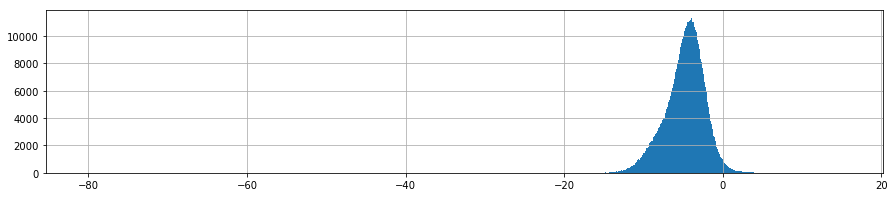

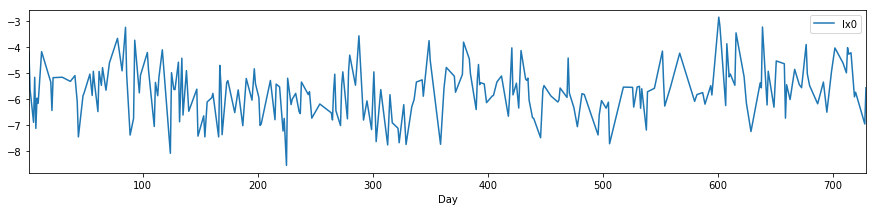

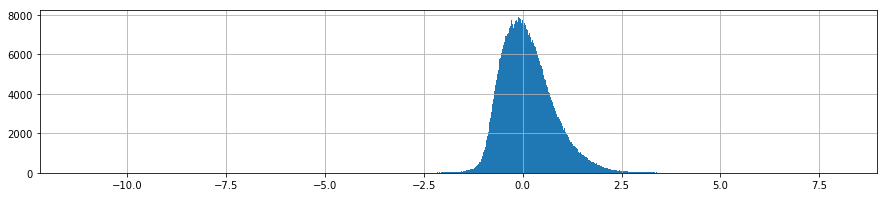

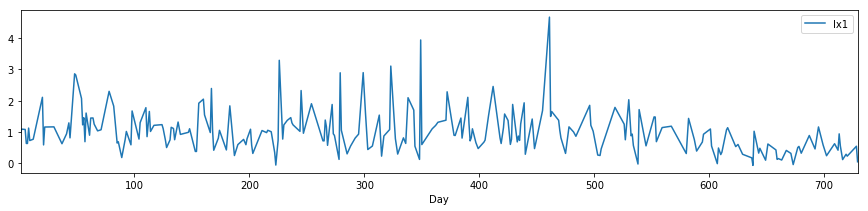

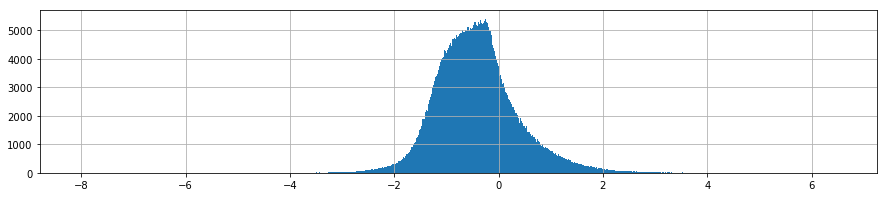

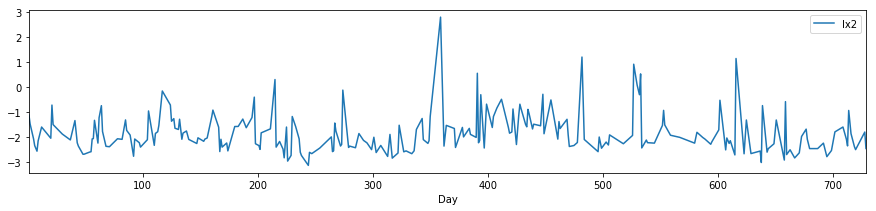

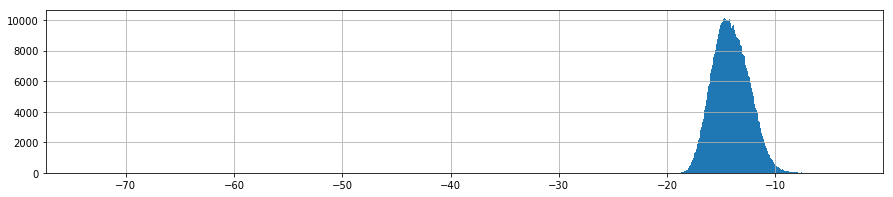

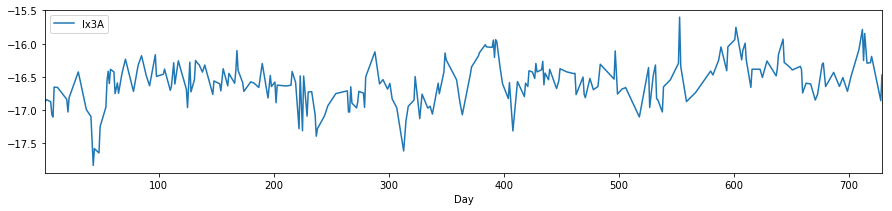

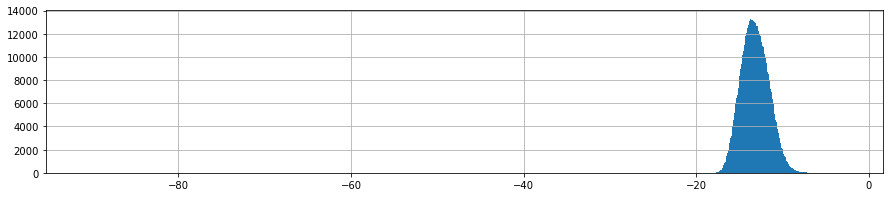

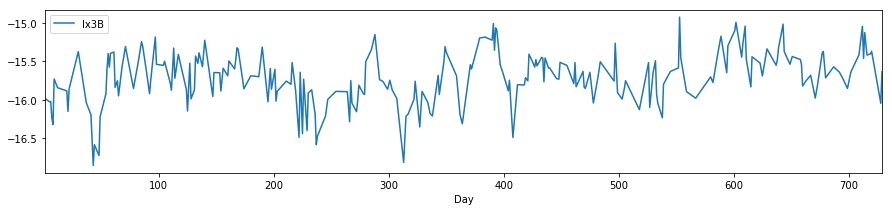

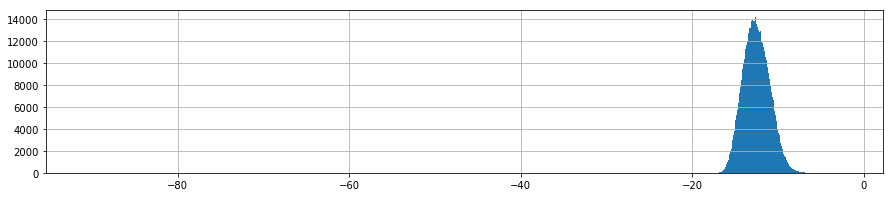

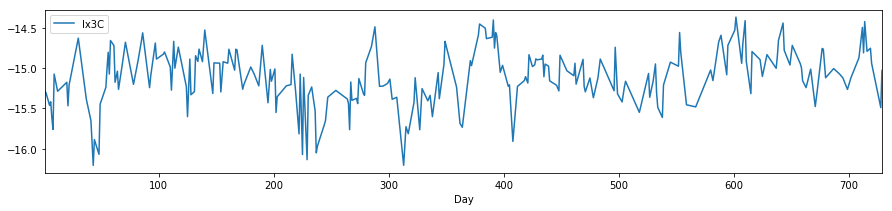

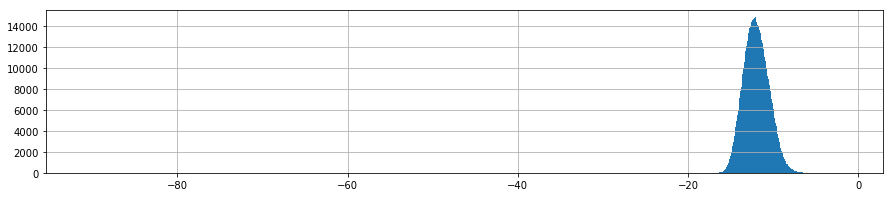

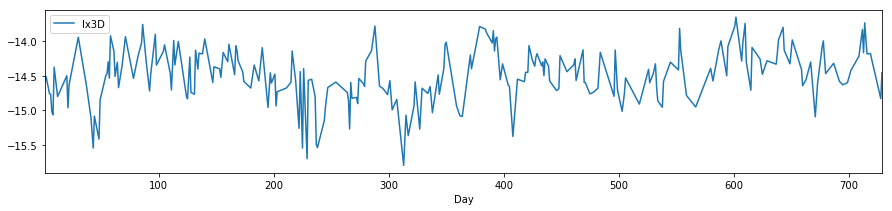

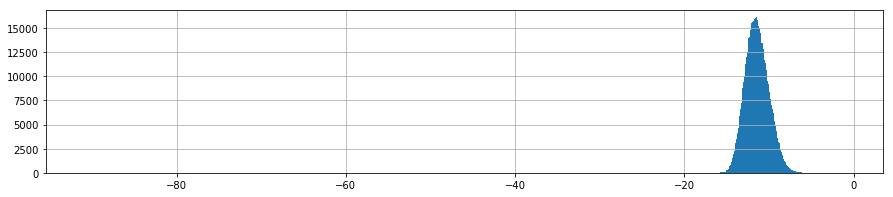

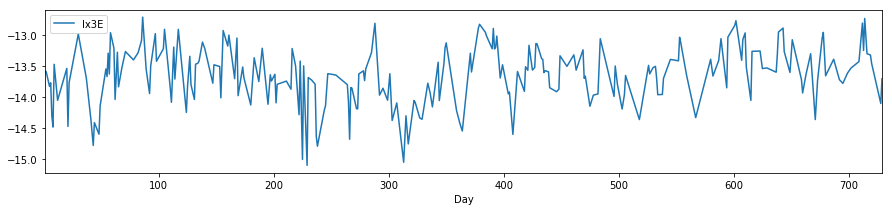

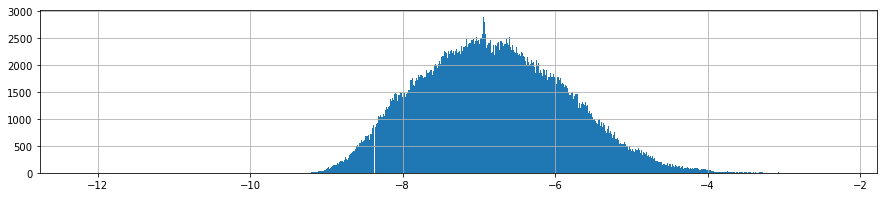

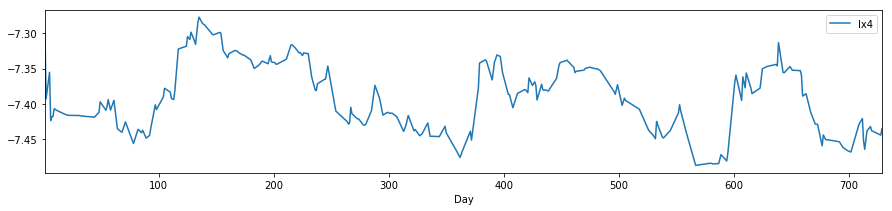

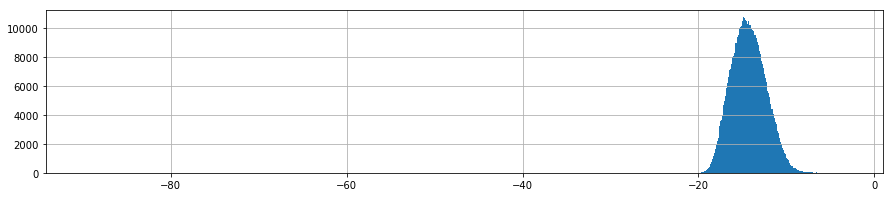

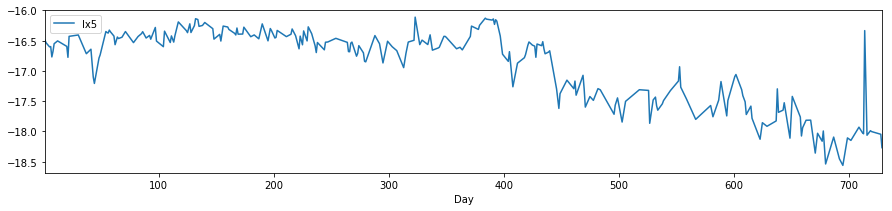

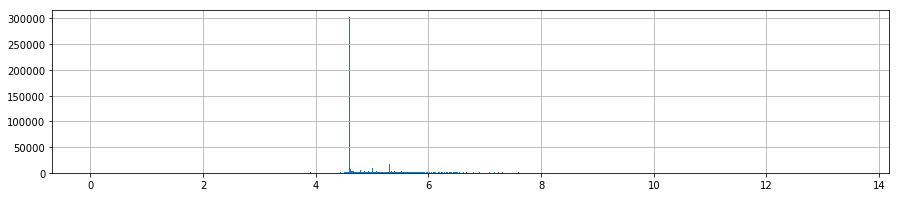

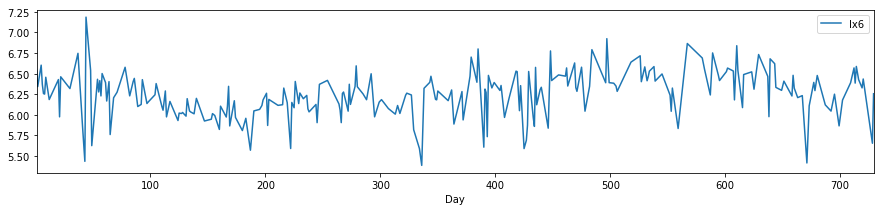

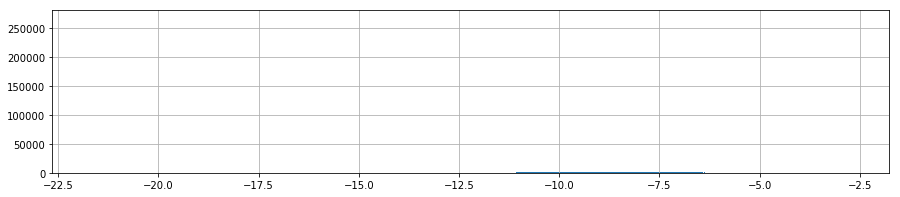

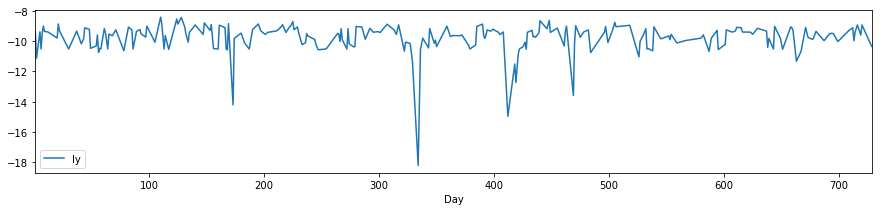

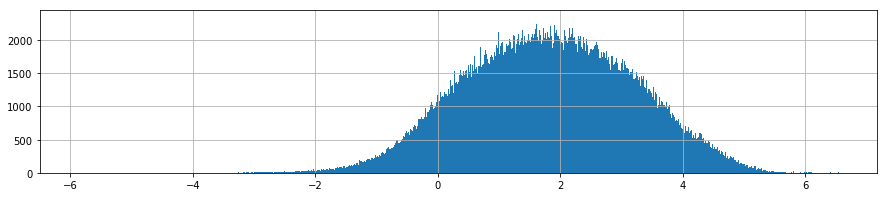

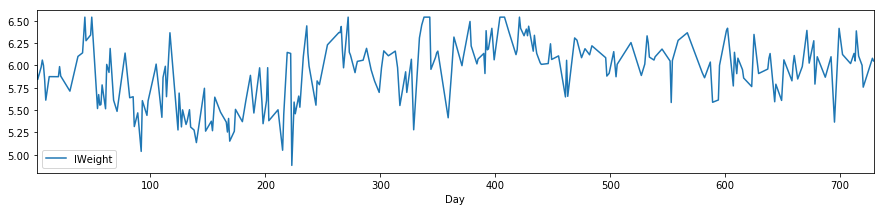

In [40]:
preview_all_log_features(train, 467)

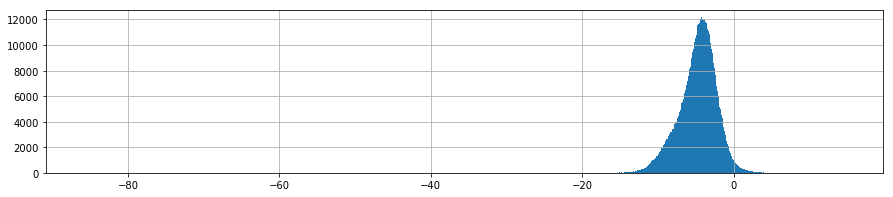

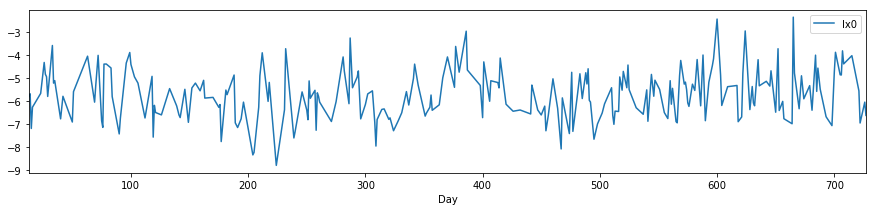

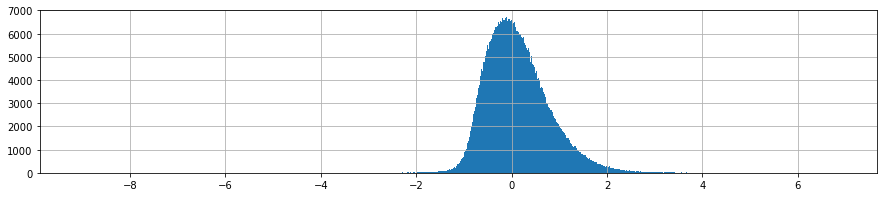

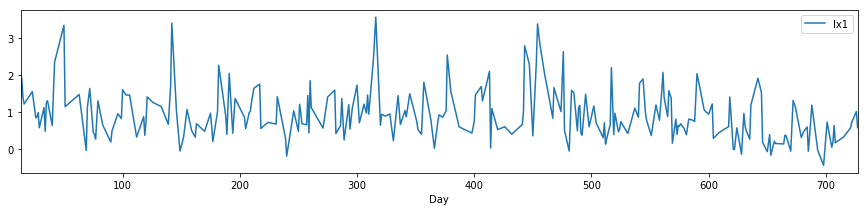

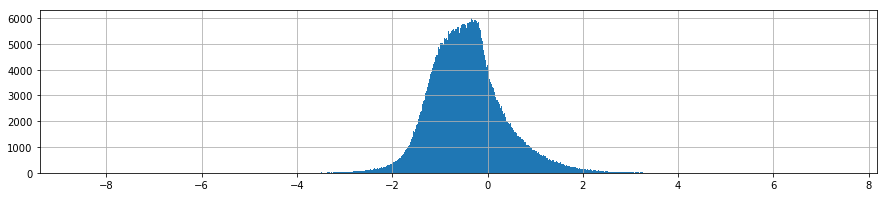

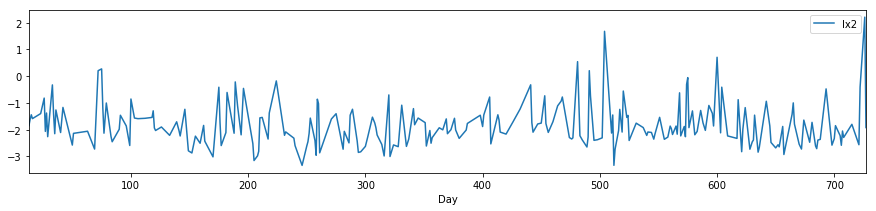

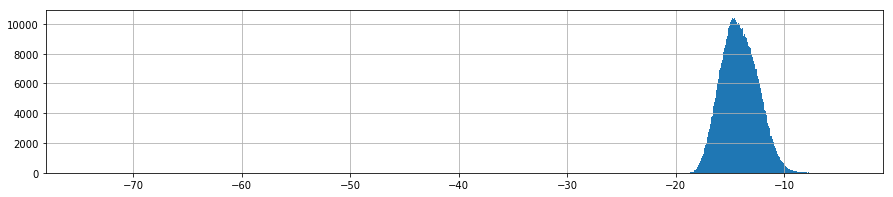

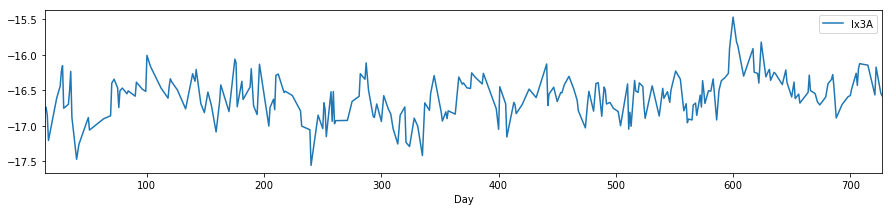

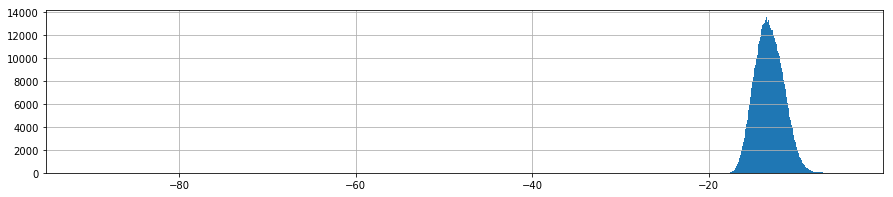

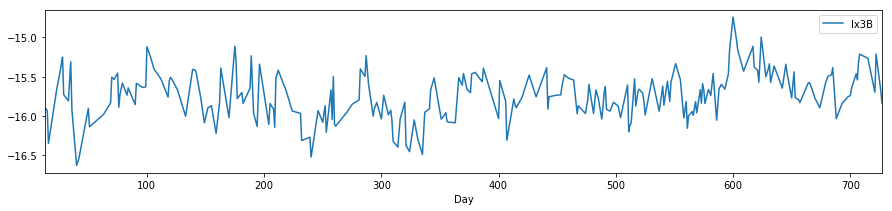

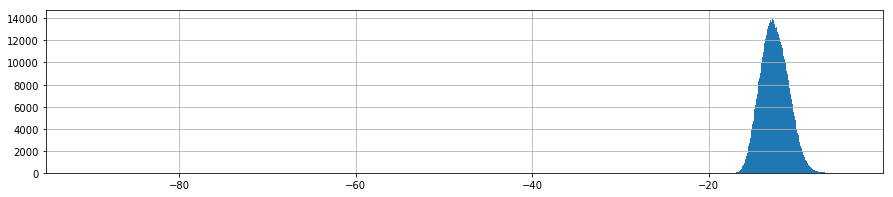

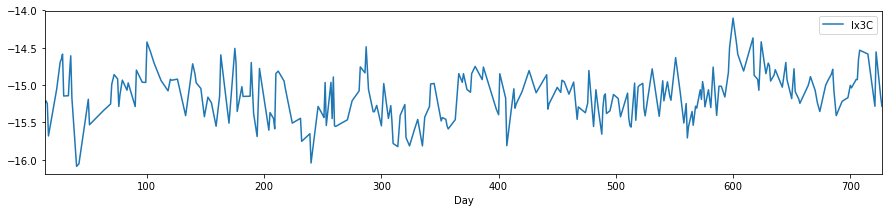

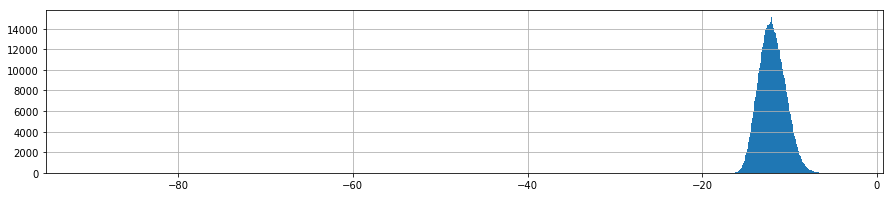

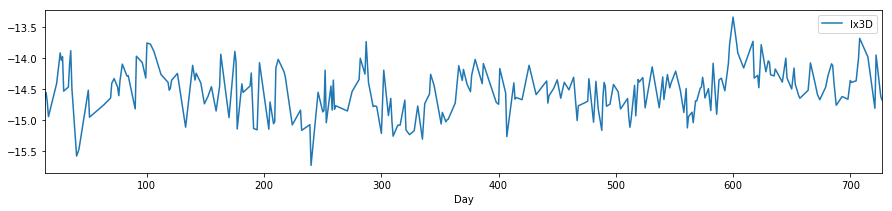

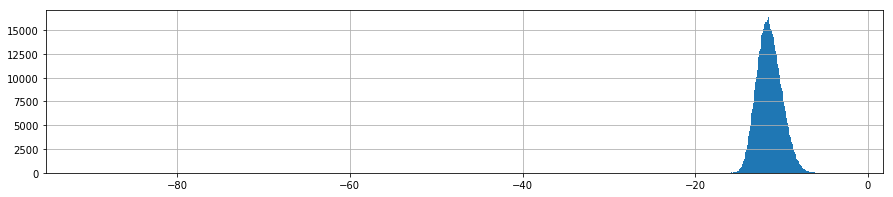

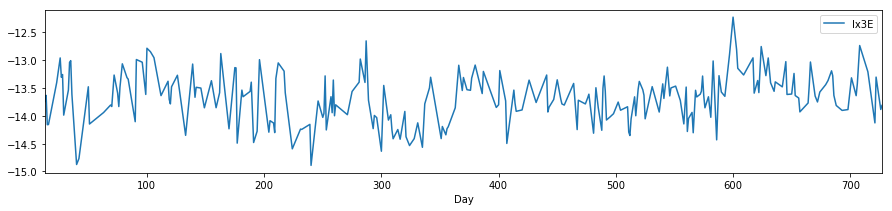

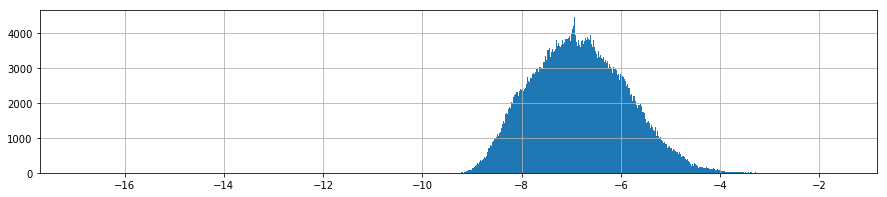

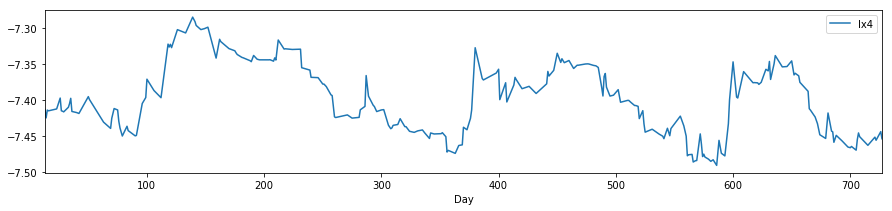

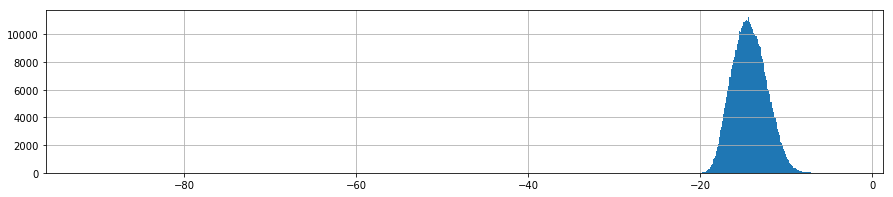

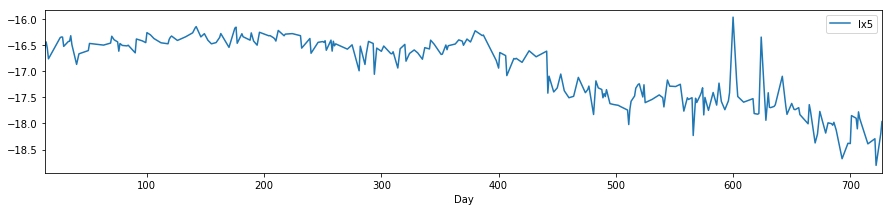

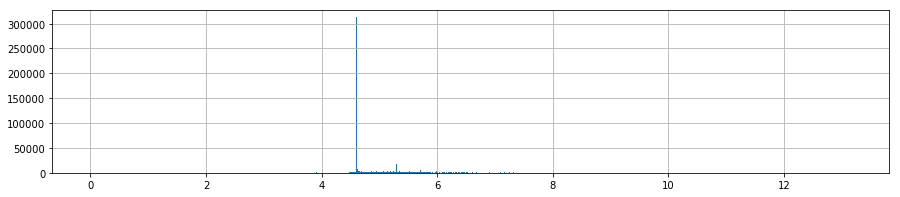

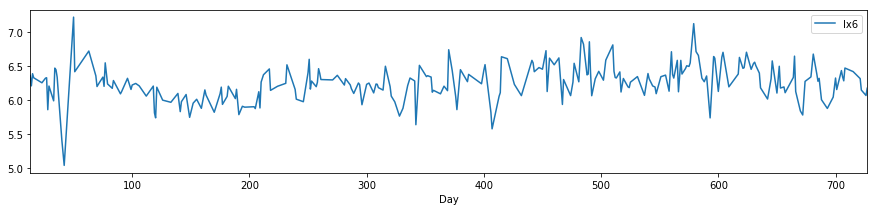

In [41]:
preview_all_log_features(test, 467)

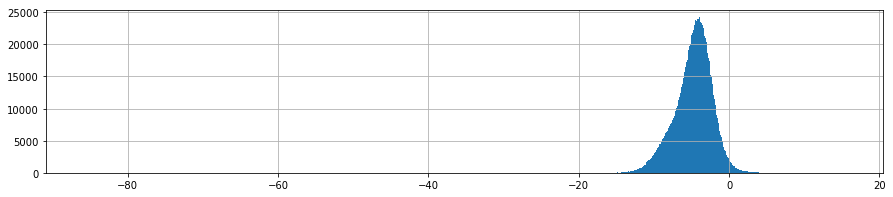

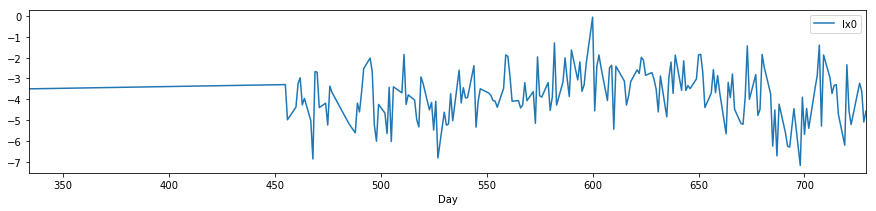

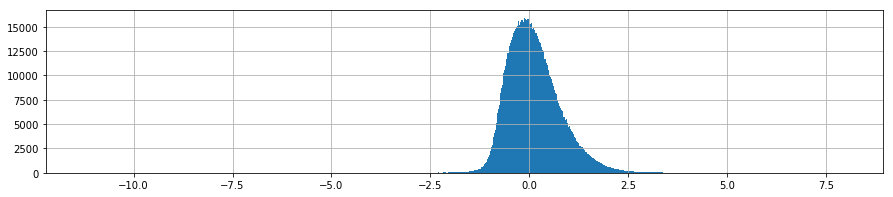

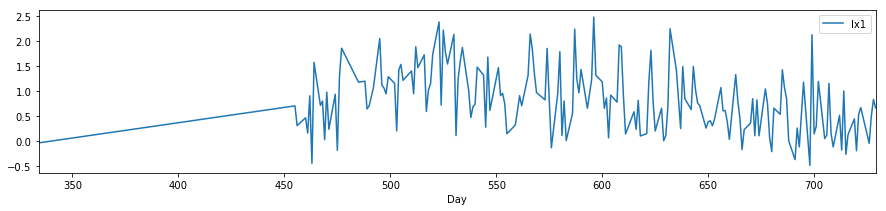

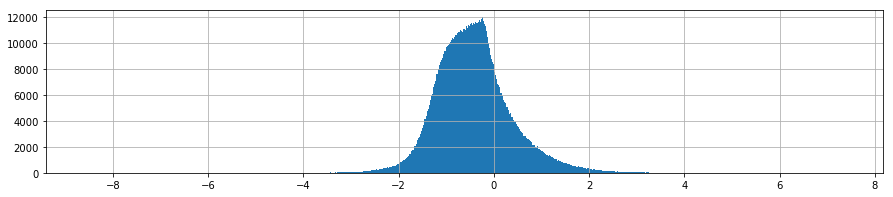

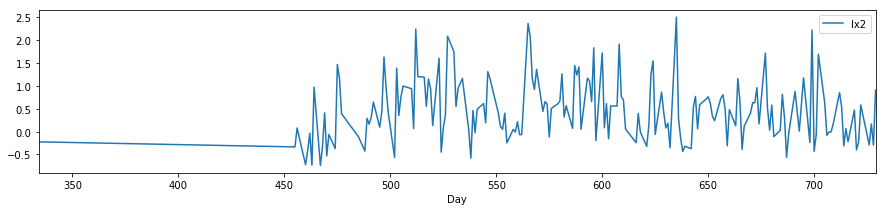

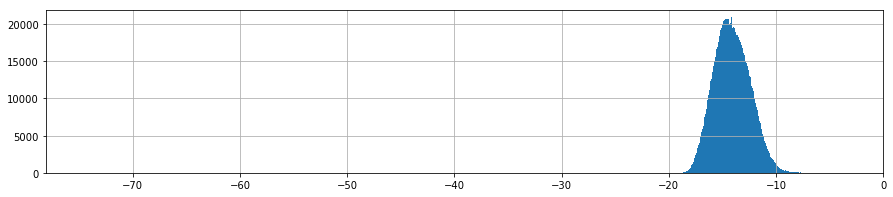

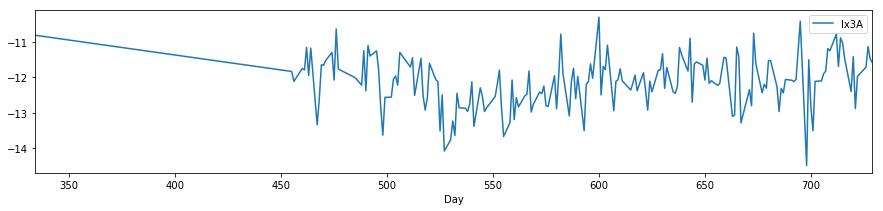

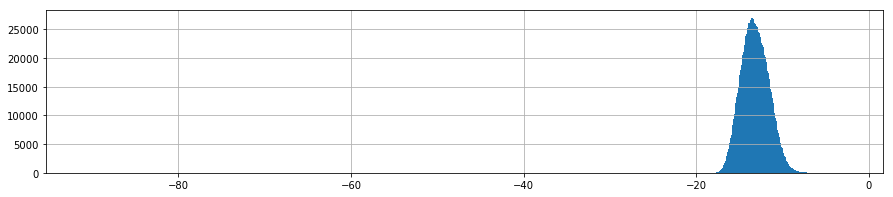

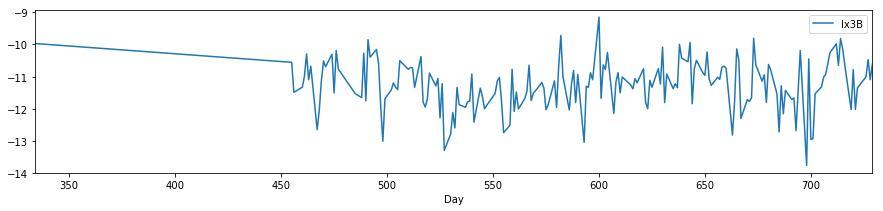

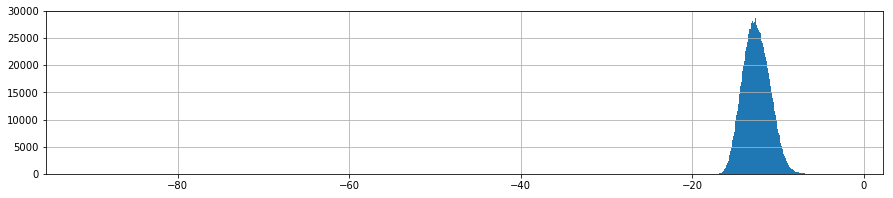

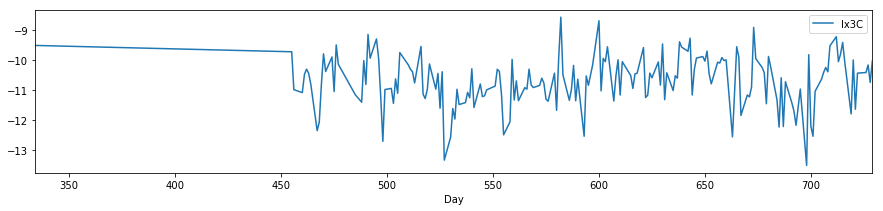

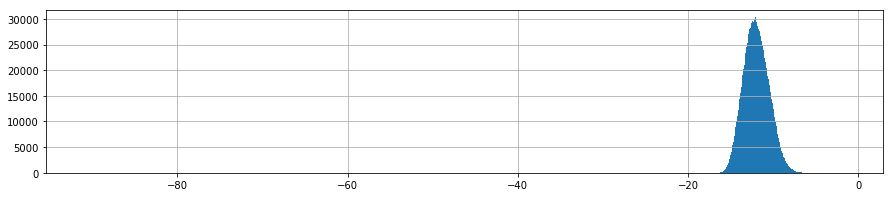

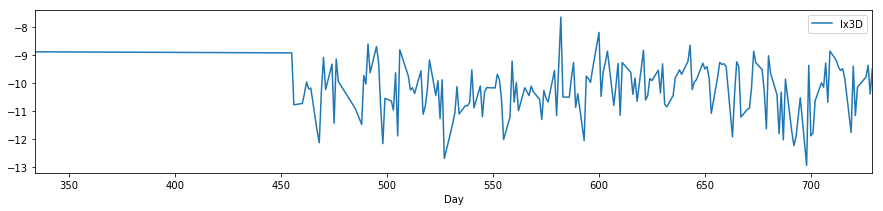

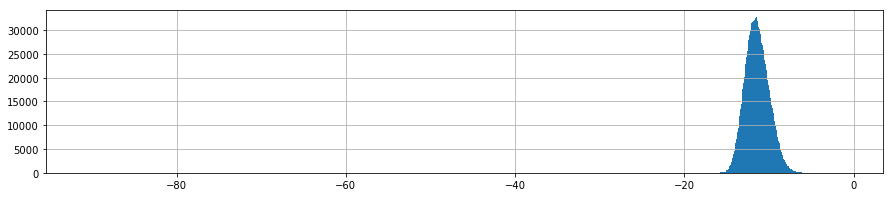

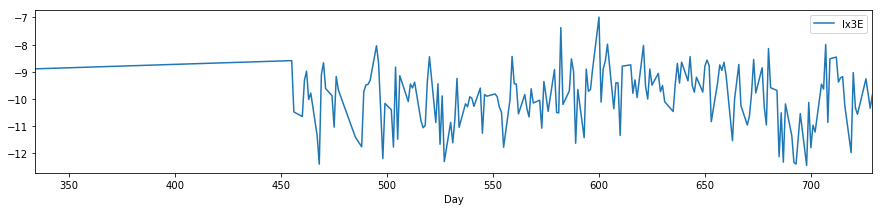

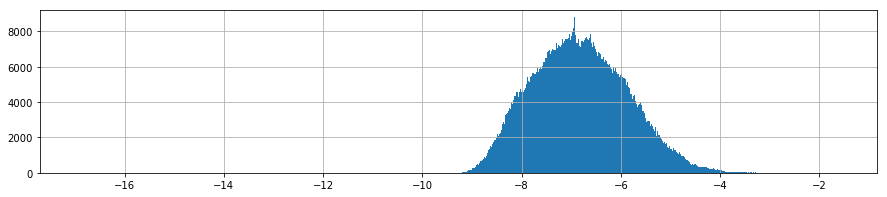

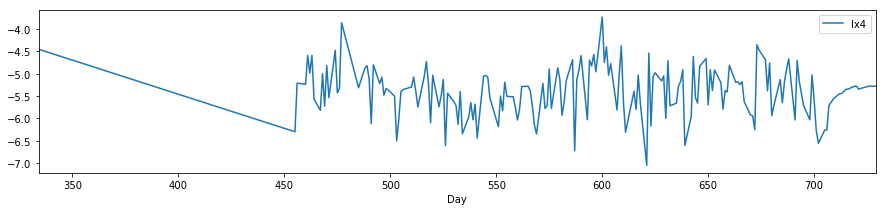

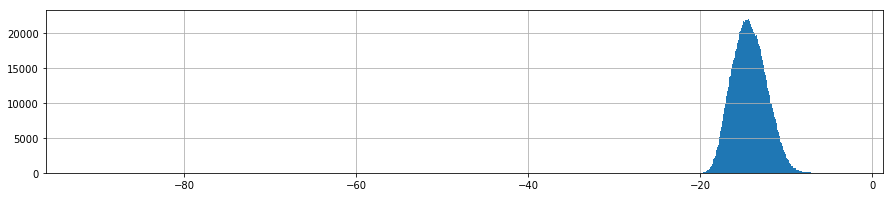

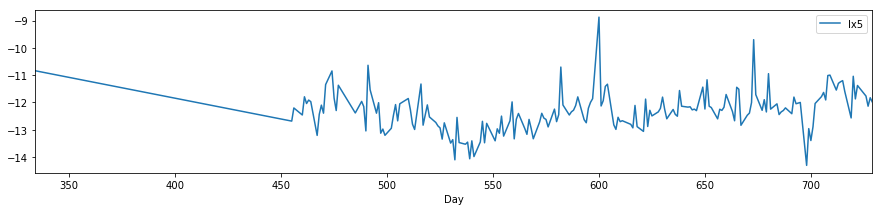

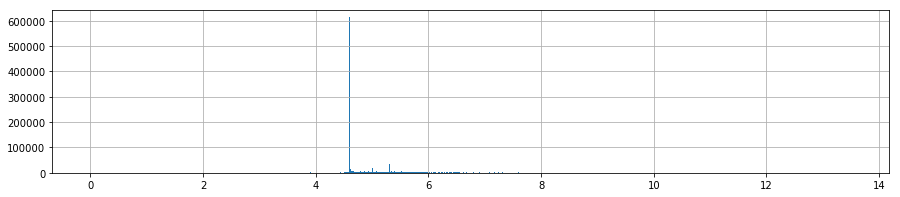

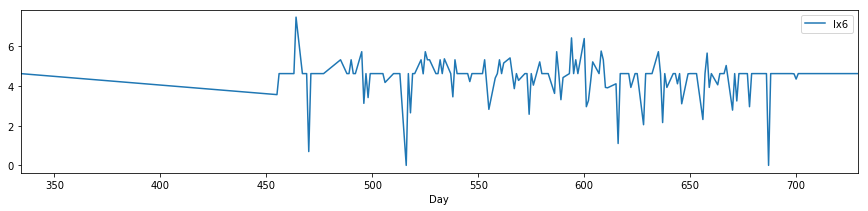

In [42]:
preview_all_log_features(traintest, 461)

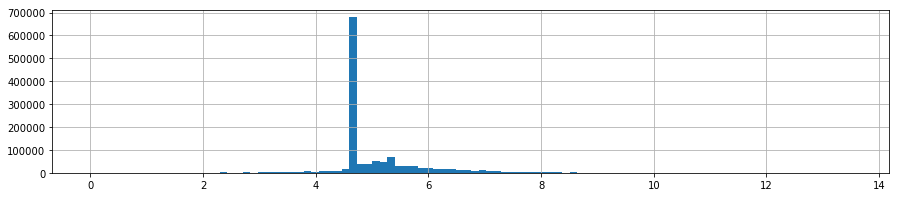

In [43]:
# Something funny with x6
plt.figure(figsize=(15,3))
ax = plt.subplot(111)
traintest['lx6'].hist(bins = 100, ax = ax)

In [44]:
traintest['x6'].value_counts()

100.000000     218704
100.000000      61267
100.000000      55995
100.000000      36775
100.000000      33388
100.000000      28700
100.000000      25666
100.000000      24344
100.000000      21920
100.000000      13720
100.000000      12339
100.000000      11798
100.000000      10338
200.000000       7881
100.000000       6895
100.000000       5995
200.000000       5108
100.000000       4833
100.000000       4372
100.000000       4311
100.000000       4115
100.000000       3040
100.000000       2933
200.000000       2883
150.000000       2786
100.000000       2651
100.000000       2610
200.000000       2288
300.000000       2101
200.000000       2011
                ...  
174.979476          1
205.277036          1
138.299634          1
139.550757          1
105.601602          1
389.364101          1
1065.040994         1
128.344065          1
907.496241          1
273.527375          1
987.315319          1
170.966148          1
100.780588          1
182.595904          1
110.625664

The value 100 and its multiples come frequently. Not sure what this means. 

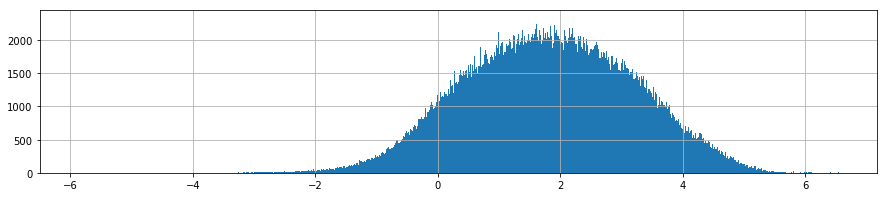

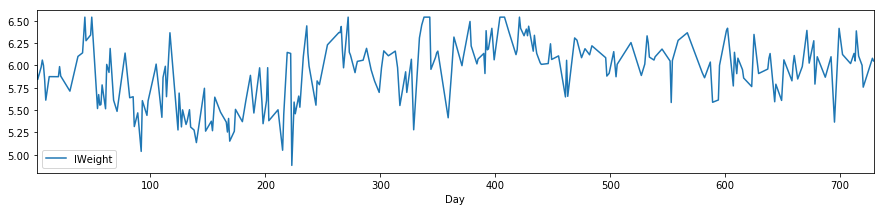

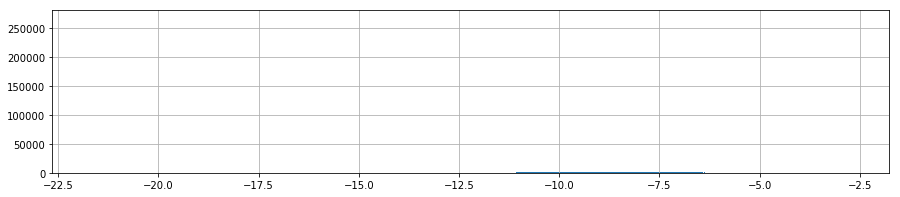

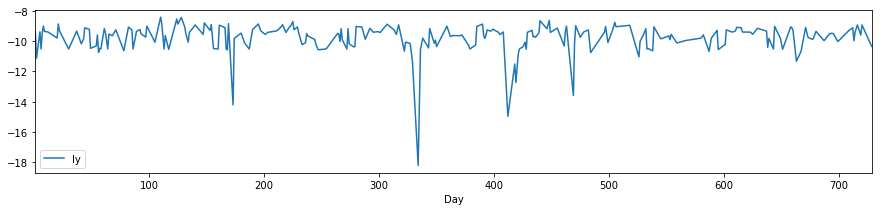

In [45]:
# Weights and response
preview_log_feature(train, 'Weight', 467)
preview_log_feature(train, 'y', 467)

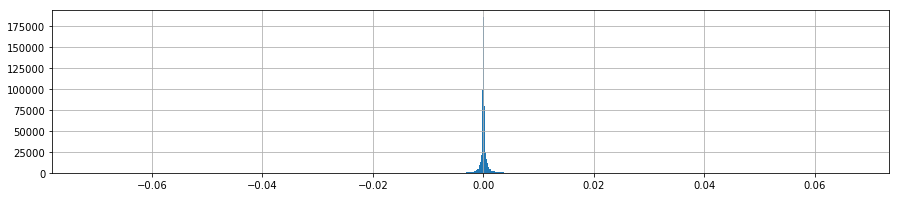

In [46]:
# The response shouldn't be logged:
plt.figure(figsize=(15,3))
ax = plt.subplot(111)
train['y'].hist(bins = 1000, ax = ax)

#### All the features, after transformation

In [47]:
log_train = train.drop(['x0', 'x1', 'x2', 'x3A', 'x3B', 'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6', 'ly', 'Weight'], axis = 1)
log_train.head()

,Market,Day,Stock,y,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6,lWeight
Index,,,,,,,,,,,,,,,,
0,1,1,363,-0.000196,-5.915820,-0.634803,-0.914268,-13.553109,-12.280897,-11.441914,-10.733364,-10.027478,-6.113783,-14.291172,5.298317,0.427735
1,1,1,1223,-0.003798,-2.512154,0.312047,0.281531,-11.008001,-10.406124,-9.852439,-10.079327,-10.079327,-4.516061,-10.284787,5.703782,-0.170072
2,1,1,1372,-0.000003,-4.650024,-0.765995,-1.114719,-16.548744,-15.275148,-14.472772,-13.737777,-13.107257,-8.092188,-17.014716,5.073247,3.395314
3,1,1,1942,-0.000008,-3.094446,-0.497215,-0.783811,-17.763838,-16.549606,-15.826539,-15.145722,-14.174932,-8.494437,-18.471757,5.357342,4.609049
4,1,1,2712,0.000065,-6.434390,-0.740831,-1.584409,-14.207093,-12.845193,-11.955389,-11.339037,-10.788062,-6.486083,-14.886001,5.035161,1.783511


In [48]:
log_test = test.drop(['x0', 'x1', 'x2', 'x3A', 'x3B', 'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6'], axis = 1)
log_test.head()

,Market,Day,Stock,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6
Index,,,,,,,,,,,,,,
0,1,13,363,-7.079731,-0.828752,-0.738463,-13.386732,-12.344427,-11.771875,-11.022577,-10.328793,-6.400357,-13.843436,4.727109
1,1,13,1223,-3.872806,-0.452332,-0.399287,-12.166057,-11.559387,-11.058506,-10.481641,-11.433652,-6.163677,-10.749180,4.605170
2,1,13,1372,-2.679753,-0.736282,-0.730193,-16.728055,-15.567931,-14.765626,-13.975601,-13.072062,-8.413549,-17.294033,5.238225
3,1,13,1942,-4.423987,-0.769594,-1.221117,-18.322452,-17.152169,-16.435498,-15.807505,-14.969091,-8.869150,-17.902950,5.357171
4,1,13,2712,-8.716556,-0.597873,-1.043181,-14.615203,-13.977629,-13.614328,-13.173071,-12.417213,-6.696603,-14.593083,4.820483


In [49]:
log_traintest = train.drop(['x0', 'x1', 'x2', 'x3A', 'x3B', 'x3C', 'x3D', 'x3E', 'x4', 'x5', 'x6'], axis = 1)
log_traintest.head()

,Market,Day,Stock,y,Weight,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6,ly,lWeight
Index,,,,,,,,,,,,,,,,,,
0,1,1,363,-0.000196,1.533780,-5.915820,-0.634803,-0.914268,-13.553109,-12.280897,-11.441914,-10.733364,-10.027478,-6.113783,-14.291172,5.298317,-10.506933,0.427735
1,1,1,1223,-0.003798,0.843604,-2.512154,0.312047,0.281531,-11.008001,-10.406124,-9.852439,-10.079327,-10.079327,-4.516061,-10.284787,5.703782,-10.506933,-0.170072
2,1,1,1372,-0.000003,29.824024,-4.650024,-0.765995,-1.114719,-16.548744,-15.275148,-14.472772,-13.737777,-13.107257,-8.092188,-17.014716,5.073247,-10.506933,3.395314
3,1,1,1942,-0.000008,100.388668,-3.094446,-0.497215,-0.783811,-17.763838,-16.549606,-15.826539,-15.145722,-14.174932,-8.494437,-18.471757,5.357342,-10.506933,4.609049
4,1,1,2712,0.000065,5.950714,-6.434390,-0.740831,-1.584409,-14.207093,-12.845193,-11.955389,-11.339037,-10.788062,-6.486083,-14.886001,5.035161,-9.635037,1.783511


In [50]:
def clean_nans(dataset):
    dataset.fillna(dataset.median(axis = 0), inplace = True)
clean_nans(log_train)
clean_nans(log_test)

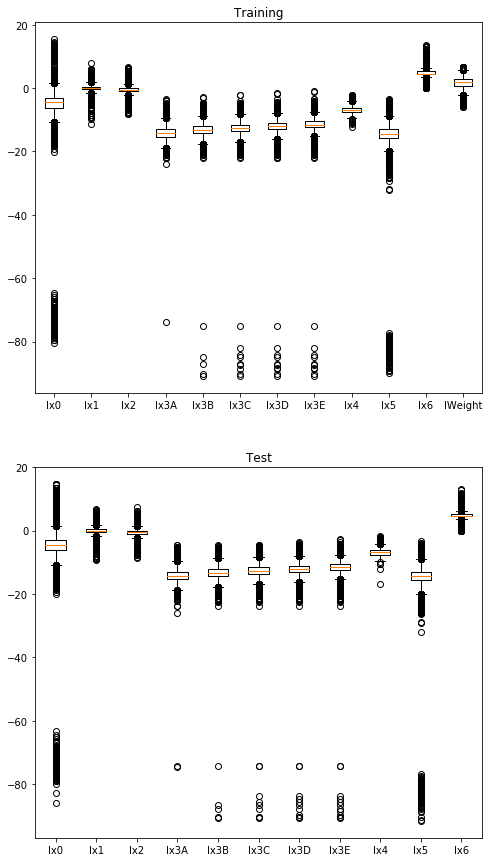

In [51]:
# Boxplot of all the features
plt.figure(figsize=(8,15))
ax = plt.subplot(211)
dat = log_train.drop(['Market','Stock','Day','y'],axis=1)
plt.boxplot(dat.as_matrix(), labels = dat.columns)
ax.set_title("Training")

ax = plt.subplot(212)
dat = log_test.drop(['Market','Stock','Day'],axis=1)
plt.boxplot(dat.as_matrix(), labels = dat.columns)
ax.set_title("Test")

plt.show()

This is really funny. Should we drop the observations around -80?? Let us see if the extreme values are independent or not.

In [52]:
log_train[log_train.lx0 < -40]
# Extreme values of lx0 are correlated with extreme values of lx5.

,Market,Day,Stock,y,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6,lWeight
Index,,,,,,,,,,,,,,,,
1983,1,8,1735,-0.000090,-73.478935,-3.303779,-0.916461,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.283014,-81.462780,7.600902,-1.290980
6375,1,48,515,0.002143,-69.269487,-1.885218,-2.537438,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-5.512153,-82.719152,5.703782,0.792222
10752,1,71,1552,0.002240,-69.051875,-1.526931,-2.742390,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-5.435914,-80.519857,5.703782,1.777360
17031,1,124,2326,0.005023,-72.158344,-3.660445,-4.527799,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.233754,-80.499178,7.600902,0.114834
20004,1,140,1784,0.001801,-71.094464,-1.025997,-1.648341,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-5.454954,-82.381656,5.298317,0.370729
20393,1,145,897,0.006626,-71.535349,-1.817248,-1.847471,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.746521,-82.744841,5.703782,-0.383975
21979,1,154,2148,0.005298,-72.687106,-0.815151,-1.698502,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.992708,-83.549893,5.703782,-0.226262
23478,1,166,2326,0.008221,-72.434185,-2.554626,-2.044064,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.213839,-81.200361,7.937375,-0.042225
23961,1,167,2696,0.002199,-71.630080,-0.826623,0.126003,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.941636,-83.092979,7.143392,-0.705425


In [53]:
log_train[log_train.lx3A < -40]
# Also extreme values in lx0 and the other lx3's

,Market,Day,Stock,y,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6,lWeight
Index,,,,,,,,,,,,,,,,
96093,2,43,294,0.001004,-73.875491,-1.289275,-3.752413,-73.846604,-75.232898,-75.232898,-75.232898,-75.232898,-5.043427,-13.742226,6.214608,-4.707447


In [54]:
log_train[log_train.lx3B < -40]
# Extreme values in the lx3B,C,D,E are correlated. Also to some extent with lx0.

,Market,Day,Stock,y,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6,lWeight
Index,,,,,,,,,,,,,,,,
96093,2,43,294,0.001004,-73.875491,-1.289275,-3.752413,-73.846604,-75.232898,-75.232898,-75.232898,-75.232898,-5.043427,-13.742226,6.214608,-4.707447
110283,2,128,294,-0.000065,-70.381702,-1.856882,-1.700833,-14.792017,-87.049460,-87.049460,-87.049460,-87.049460,-5.075510,-11.242210,5.347108,-3.042926
170555,2,527,793,0.010244,-4.513669,-0.305462,-0.825036,-8.866189,-84.721862,-84.721862,-84.721862,-84.721862,-3.658040,-80.562979,9.952278,-1.313916
192881,2,709,909,0.000891,-4.513669,-1.661353,-3.343218,-16.870686,-90.190326,-90.190326,-90.190326,-90.190326,-4.507227,-11.368550,5.768321,-3.053636
618699,4,638,2174,-0.041499,-4.513669,-1.139464,1.646819,-16.586693,-90.933745,-90.933745,-90.933745,-90.933745,-3.518496,-13.814104,2.484907,-3.273298


In [55]:
log_train[log_train.lx5 < -40]
# Extreme values in the lx5 are very often associated with Extreme values in lx0.

,Market,Day,Stock,y,lx0,lx1,lx2,lx3A,lx3B,lx3C,lx3D,lx3E,lx4,lx5,lx6,lWeight
Index,,,,,,,,,,,,,,,,
1983,1,8,1735,-0.000090,-73.478935,-3.303779,-0.916461,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.283014,-81.462780,7.600902,-1.290980
6375,1,48,515,0.002143,-69.269487,-1.885218,-2.537438,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-5.512153,-82.719152,5.703782,0.792222
10752,1,71,1552,0.002240,-69.051875,-1.526931,-2.742390,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-5.435914,-80.519857,5.703782,1.777360
17031,1,124,2326,0.005023,-72.158344,-3.660445,-4.527799,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.233754,-80.499178,7.600902,0.114834
20004,1,140,1784,0.001801,-71.094464,-1.025997,-1.648341,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-5.454954,-82.381656,5.298317,0.370729
20393,1,145,897,0.006626,-71.535349,-1.817248,-1.847471,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.746521,-82.744841,5.703782,-0.383975
21979,1,154,2148,0.005298,-72.687106,-0.815151,-1.698502,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.992708,-83.549893,5.703782,-0.226262
23478,1,166,2326,0.008221,-72.434185,-2.554626,-2.044064,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.213839,-81.200361,7.937375,-0.042225
23961,1,167,2696,0.002199,-71.630080,-0.826623,0.126003,-14.185959,-13.233685,-12.617167,-12.075475,-11.495258,-4.941636,-83.092979,7.143392,-0.705425


In [56]:
r_log_train = log_train.drop(['Market','Stock','Day','y','lWeight'],axis=1)
r_log_test = log_test.drop(['Market','Stock','Day'],axis=1)
r_log_traintest = log_traintest.drop(['Market','Stock','Day'],axis=1)


#### Bivariate analysis

In [57]:
"""# Dendrogram representing the similarities of the features.
fdist = lambda x,y : pdist(x-y, 'minkowski', 1)
Z = linkage(r_log_train.T, 
            method = 'average', 
            metric = fdist)
dend = dendrogram(Z)"""

"# Dendrogram representing the similarities of the features.\nfdist = lambda x,y : pdist(x-y, 'minkowski', 1)\nZ = linkage(r_log_train.T, \n            method = 'average', \n            metric = fdist)\ndend = dendrogram(Z)"

In [58]:
"""# Ordering the features
ord_cols = [u'feature{}'.format(i+1) for i in dend['leaves']]
print 'Column ordering:', [i+1 for i in dend['leaves']]
training_data_drop_ord = training_data.drop(['target','id','data_type','era'],axis=1)[ord_cols]
prediction_data_drop_ord = prediction_data[prediction_data.data_type == 'test'].drop(['target','id','data_type','era'],axis=1)[ord_cols]
"""

"# Ordering the features\nord_cols = [u'feature{}'.format(i+1) for i in dend['leaves']]\nprint 'Column ordering:', [i+1 for i in dend['leaves']]\ntraining_data_drop_ord = training_data.drop(['target','id','data_type','era'],axis=1)[ord_cols]\nprediction_data_drop_ord = prediction_data[prediction_data.data_type == 'test'].drop(['target','id','data_type','era'],axis=1)[ord_cols]\n"

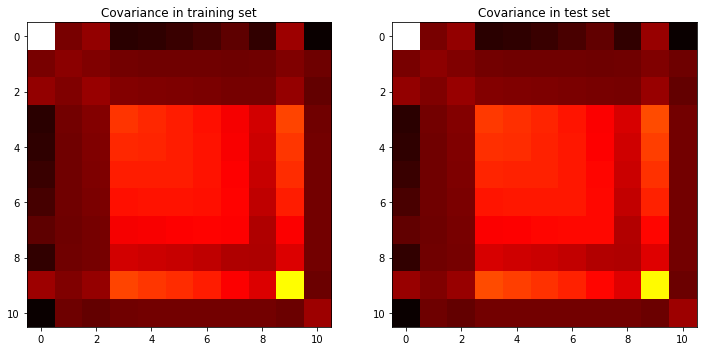

In [59]:
# Covariance matrix
plt.figure(figsize=(12,10))

ax = plt.subplot(121)
cov_train = r_log_train.cov()
plt.imshow(cov_train, cmap='hot', interpolation='nearest')
ax.set_title("Covariance in training set")

ax = plt.subplot(122)
cov_test = r_log_test.cov()
plt.imshow(cov_test, cmap='hot', interpolation='nearest')
ax.set_title("Covariance in test set")

plt.show()

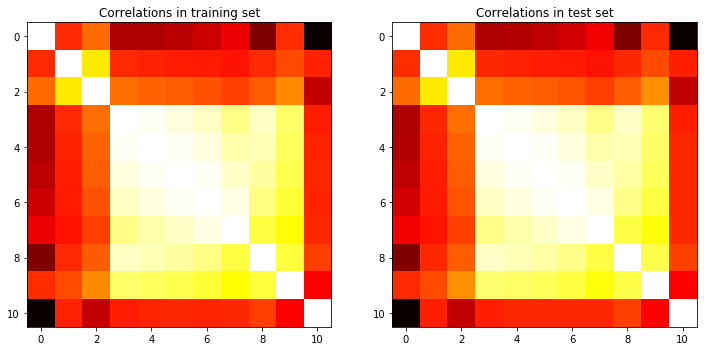

In [60]:
# Correlation matrix
plt.figure(figsize=(12,10))

ax = plt.subplot(121)
corr_train = r_log_train.corr()
plt.imshow(corr_train, cmap='hot', interpolation='nearest')
ax.set_title("Correlations in training set")

ax = plt.subplot(122)
corr_test = r_log_test.corr()
plt.imshow(corr_test, cmap='hot', interpolation='nearest')
ax.set_title("Correlations in test set")

plt.show()